# Objective

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. I will be using Principle component analysis for dimensionality reduction and then will apply classification.

# Step -1 )
Importing all required packages & Load dataset

In [531]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

Now Importing Vehicle dataset

In [532]:
import os

os.chdir("C:\\Great lakes\\Unsupervised learning & PCA\\PROJECT")

In [533]:
Vehicle=pd.read_csv("vehicle.csv")

# Step- 2)
Explorary data analysis

In [534]:
Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Need to do label encoding for dependent variable "class" 

In [535]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Vehicle['class']= label_encoder.fit_transform(Vehicle['class']) 
  
Vehicle['class'].unique()

array([2, 1, 0], dtype=int64)

Let us find out the shape of dataset

In [536]:
Vehicle.shape

(846, 19)

In [537]:
#Let us check the summary of dataset
Vehicle.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [465]:
Vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

From above output we can conclude below :

1) There are some missing values in features like Circularity , Distance_circularity , Radius_ratio etc.

2) radius_ratio is right skewed.

3) scaled_variance.1 is also right skewed and there is potentially some outliers.


In [538]:
# Now let us fill NaN with median of its respective variable.

Vehicle=Vehicle.fillna(Vehicle.median())

In [539]:
# Let us check summary after removing blanks.
Vehicle.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

Let us now check for outliers with boxplots :

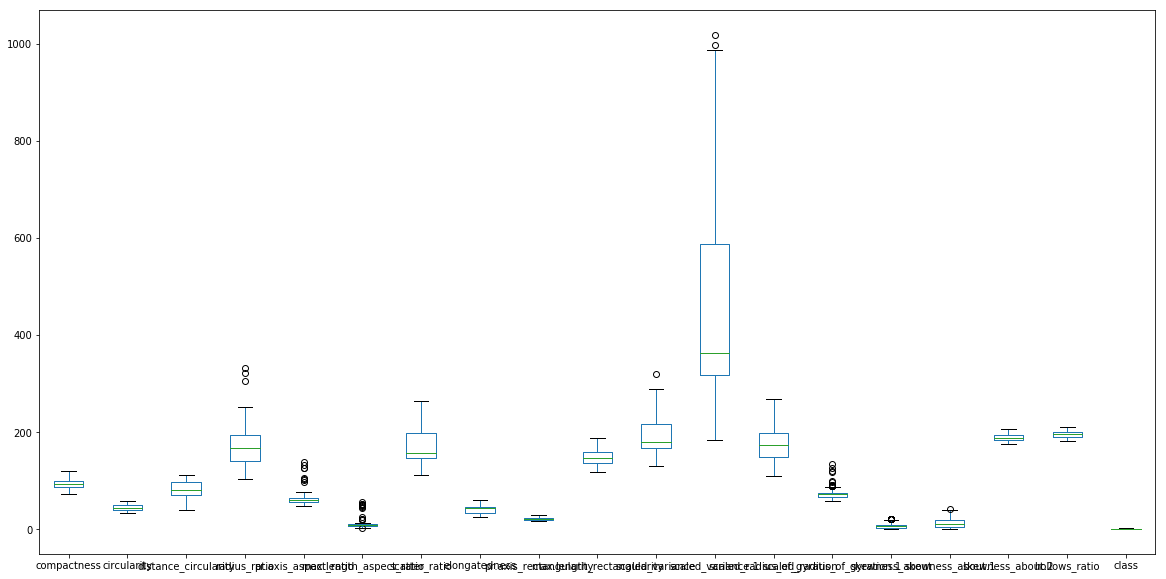

In [540]:
#sns.boxplot(Vehicle['compactness'])

Vehicle.plot(kind= 'box', figsize=(20,10))

From above plot we now know following features are having outliers : 
radius_ratio , pr.axis_aspect_ratio, max.length_aspect_ratio ,scaled_variance ,scaled_variance.1,'scaled_radius_of_gyration.1,skewness_about

# Step-3)

Now treating outliers for above mentioned features.

I will adopt capping technique for treating outliers :

Treating outliers for radius_ratio

In [541]:
from scipy.stats import iqr

In [542]:
Vehicle['class'].unique()

array([2, 1, 0], dtype=int64)

In [543]:
IQR_radius_ratio = iqr(Vehicle['radius_ratio'], axis=0)
print("IQR_radius_ratio - ",IQR_radius_ratio*1.5)
Q3_radius_ratio= np.percentile(Vehicle.radius_ratio, 75)
Q1_radius_ratio= np.percentile(Vehicle.radius_ratio, 25)
cap_radius_ratio = IQR_radius_ratio*1.5+Q3_radius_ratio
floor_radius_ratio =Q1_radius_ratio -IQR_radius_ratio*1.5
print("Cap_radius_ratio - ",cap_radius_ratio)
print("Floor_radius_ratio - ",floor_radius_ratio)

IQR_radius_ratio -  81.0
Cap_radius_ratio -  276.0
Floor_radius_ratio -  60.0


In [544]:
Vehicle[Vehicle["radius_ratio"] >cap_radius_ratio]['radius_ratio'] =cap_radius_ratio

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Treating outliers for pr.axis_aspect_ratio

Due to "pr." presence in the feature name i have to rename it as "pr_" to avoid errors while using syntaxes.

In [545]:
Vehicle.rename(columns={'pr.axis_aspect_ratio': 'pr_axis_aspect_ratio'},inplace=True)
Vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [546]:
IQR_pr_axis_aspect_ratio = iqr(Vehicle['pr_axis_aspect_ratio'], axis=0)
print("IQR_pr_axis_aspect_ratio- ",IQR_pr_axis_aspect_ratio*1.5)
Q3_pr_axis_aspect_ratio= np.percentile(Vehicle.pr_axis_aspect_ratio, 75)
Q1_pr_axis_aspect_ratio= np.percentile(Vehicle.pr_axis_aspect_ratio, 25)
cap_pr_axis_aspect_ratio = IQR_pr_axis_aspect_ratio*1.5+Q3_pr_axis_aspect_ratio
floor_pr_axis_aspect_ratio =Q1_pr_axis_aspect_ratio-IQR_pr_axis_aspect_ratio*1.5
print("Cap_pr_axis_aspect_ratio - ",cap_pr_axis_aspect_ratio)
print("Floor_pr_axis_aspect_ratio -",floor_pr_axis_aspect_ratio)

IQR_pr_axis_aspect_ratio-  12.0
Cap_pr_axis_aspect_ratio -  77.0
Floor_pr_axis_aspect_ratio - 45.0


In [547]:
Vehicle[Vehicle["pr_axis_aspect_ratio"] >cap_pr_axis_aspect_ratio]["pr_axis_aspect_ratio"] =cap_pr_axis_aspect_ratio

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Treating outliers for max.length_aspect_ratio

In [480]:
Vehicle.rename(columns={'max.length_aspect_ratio': 'max_length_aspect_ratio'},inplace=True)
Vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [481]:
IQR_max_length_aspect_ratio = iqr(Vehicle['max_length_aspect_ratio'], axis=0)
print("IQR_max_length_aspect_ratio- ",IQR_max_length_aspect_ratio*1.5)
Q3_max_length_aspect_ratio= np.percentile(Vehicle.max_length_aspect_ratio, 75)
Q1_max_length_aspect_ratio= np.percentile(Vehicle.max_length_aspect_ratio, 25)
cap_max_length_aspect_ratio = IQR_max_length_aspect_ratio*1.5+Q3_max_length_aspect_ratio
floor_max_length_aspect_ratio =Q1_max_length_aspect_ratio-IQR_max_length_aspect_ratio*1.5
print("Cap_max_length_aspect_ratio - ",cap_max_length_aspect_ratio)
print("Floor_max_length_aspect_ratio -",floor_max_length_aspect_ratio)

IQR_max_length_aspect_ratio-  4.5
Cap_max_length_aspect_ratio -  14.5
Floor_max_length_aspect_ratio - 2.5


In [482]:
Vehicle[Vehicle["max_length_aspect_ratio"] >cap_max_length_aspect_ratio]["max_length_aspect_ratio"] = cap_max_length_aspect_ratio
Vehicle[Vehicle["max_length_aspect_ratio"] <floor_max_length_aspect_ratio]["max_length_aspect_ratio"] = floor_max_length_aspect_ratio

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Treating outlier for "scaled_variance"

In [381]:
IQR_scaled_variance = iqr(Vehicle['scaled_variance'], axis=0)
print("IQR_scaled_variance- ",IQR_scaled_variance*1.5)
Q3_scaled_variance= np.percentile(Vehicle.scaled_variance, 75)
Q1_scaled_variance= np.percentile(Vehicle.scaled_variance, 25)
cap_scaled_variance = IQR_scaled_variance*1.5+Q3_scaled_variance
floor_scaled_variance =Q1_scaled_variance-IQR_scaled_variance*1.5
print("Cap_scaled_variance - ",cap_scaled_variance)
print("Floor_scaled_variance -",floor_scaled_variance)

IQR_scaled_variance-  73.5
Cap_scaled_variance -  289.5
Floor_scaled_variance - 93.5


In [484]:
Vehicle[Vehicle["scaled_variance"] >cap_scaled_variance]["scaled_variance"] = cap_scaled_variance

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [485]:
Vehicle[Vehicle["scaled_variance"] <floor_scaled_variance]["scaled_variance"] = floor_scaled_variance

Treating outlier for "scaled_variance.1"

In [548]:
Vehicle.rename(columns={'scaled_variance.1': 'scaled_variance_1'},inplace=True)
Vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [556]:
IQR_scaled_variance_1 = iqr(Vehicle['scaled_variance_1'], axis=0)
print("IQR_scaled_variance_1- ",IQR_scaled_variance_1*1.5)
Q3_scaled_variance_1= np.percentile(Vehicle.scaled_variance_1, 75)
Q1_scaled_variance_1= np.percentile(Vehicle.scaled_variance_1, 25)
cap_scaled_variance_1 = IQR_scaled_variance_1*1.5+Q3_scaled_variance_1
floor_scaled_variance_1 =Q1_scaled_variance_1-IQR_scaled_variance_1*1.5
print("Cap_scaled_variance_1 - ",cap_scaled_variance_1)

IQR_scaled_variance_1-  402.75
Cap_scaled_variance_1 -  989.5


In [550]:
Vehicle[Vehicle["scaled_variance_1"] >cap_scaled_variance_1]["scaled_variance_1"] = cap_scaled_variance_1

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now treating outlier for scaled_radius_of_gyration.1 variable

In [492]:
Vehicle.rename(columns={'scaled_radius_of_gyration.1': 'scaled_radius_of_gyration_1'},inplace=True)
Vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [493]:
IQR_scaled_radius_of_gyration_1 = iqr(Vehicle['scaled_radius_of_gyration_1'], axis=0)
print("IQR_scaled_radius_of_gyration_1- ",IQR_scaled_radius_of_gyration_1*1.5)
Q3_scaled_radius_of_gyration_1= np.percentile(Vehicle.scaled_radius_of_gyration_1, 75)
Q1_scaled_radius_of_gyration_1= np.percentile(Vehicle.scaled_radius_of_gyration_1, 25)
cap_scaled_radius_of_gyration_1 = (IQR_scaled_radius_of_gyration_1*1.5)+Q3_scaled_radius_of_gyration_1
floor_scaled_radius_of_gyration_1 =Q1_scaled_radius_of_gyration_1-IQR_scaled_radius_of_gyration_1*1.5
print("Cap_scaled_radius_of_gyration_1 - ",cap_scaled_radius_of_gyration_1)

IQR_scaled_radius_of_gyration_1-  12.0
Cap_scaled_radius_of_gyration_1 -  87.0


In [494]:
Vehicle[Vehicle["scaled_radius_of_gyration_1"] >cap_scaled_radius_of_gyration_1]["scaled_radius_of_gyration_1"] = cap_scaled_radius_of_gyration_1

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now treating outliers for "skewness_about"

In [554]:
IQR_skewness_about = iqr(Vehicle['skewness_about'], axis=0)
print("IQR_skewness_about- ",IQR_skewness_about*1.5)
Q3_skewness_about= np.percentile(Vehicle.skewness_about, 75)
Q1_skewness_about= np.percentile(Vehicle.skewness_about, 25)
cap_skewness_about = (IQR_scaled_radius_of_gyration_1*1.5)+Q3_scaled_radius_of_gyration_1
floor_scaled_radius_of_gyration_1 =Q1_skewness_about-IQR_skewness_about*1.5
print("Cap_skewness_about - ",cap_skewness_about)

IQR_skewness_about-  10.5
Cap_skewness_about -  87.0


In [555]:
Vehicle[Vehicle["skewness_about"] >cap_skewness_about]["skewness_about"] = cap_skewness_about

Now checking Outlier plot again :

Let us check pair plot to visualize correltion with each other.

# Step-4)

Now let us check pair plots of all features for visualization of correlation between independed features.

C:\Users\rashmi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


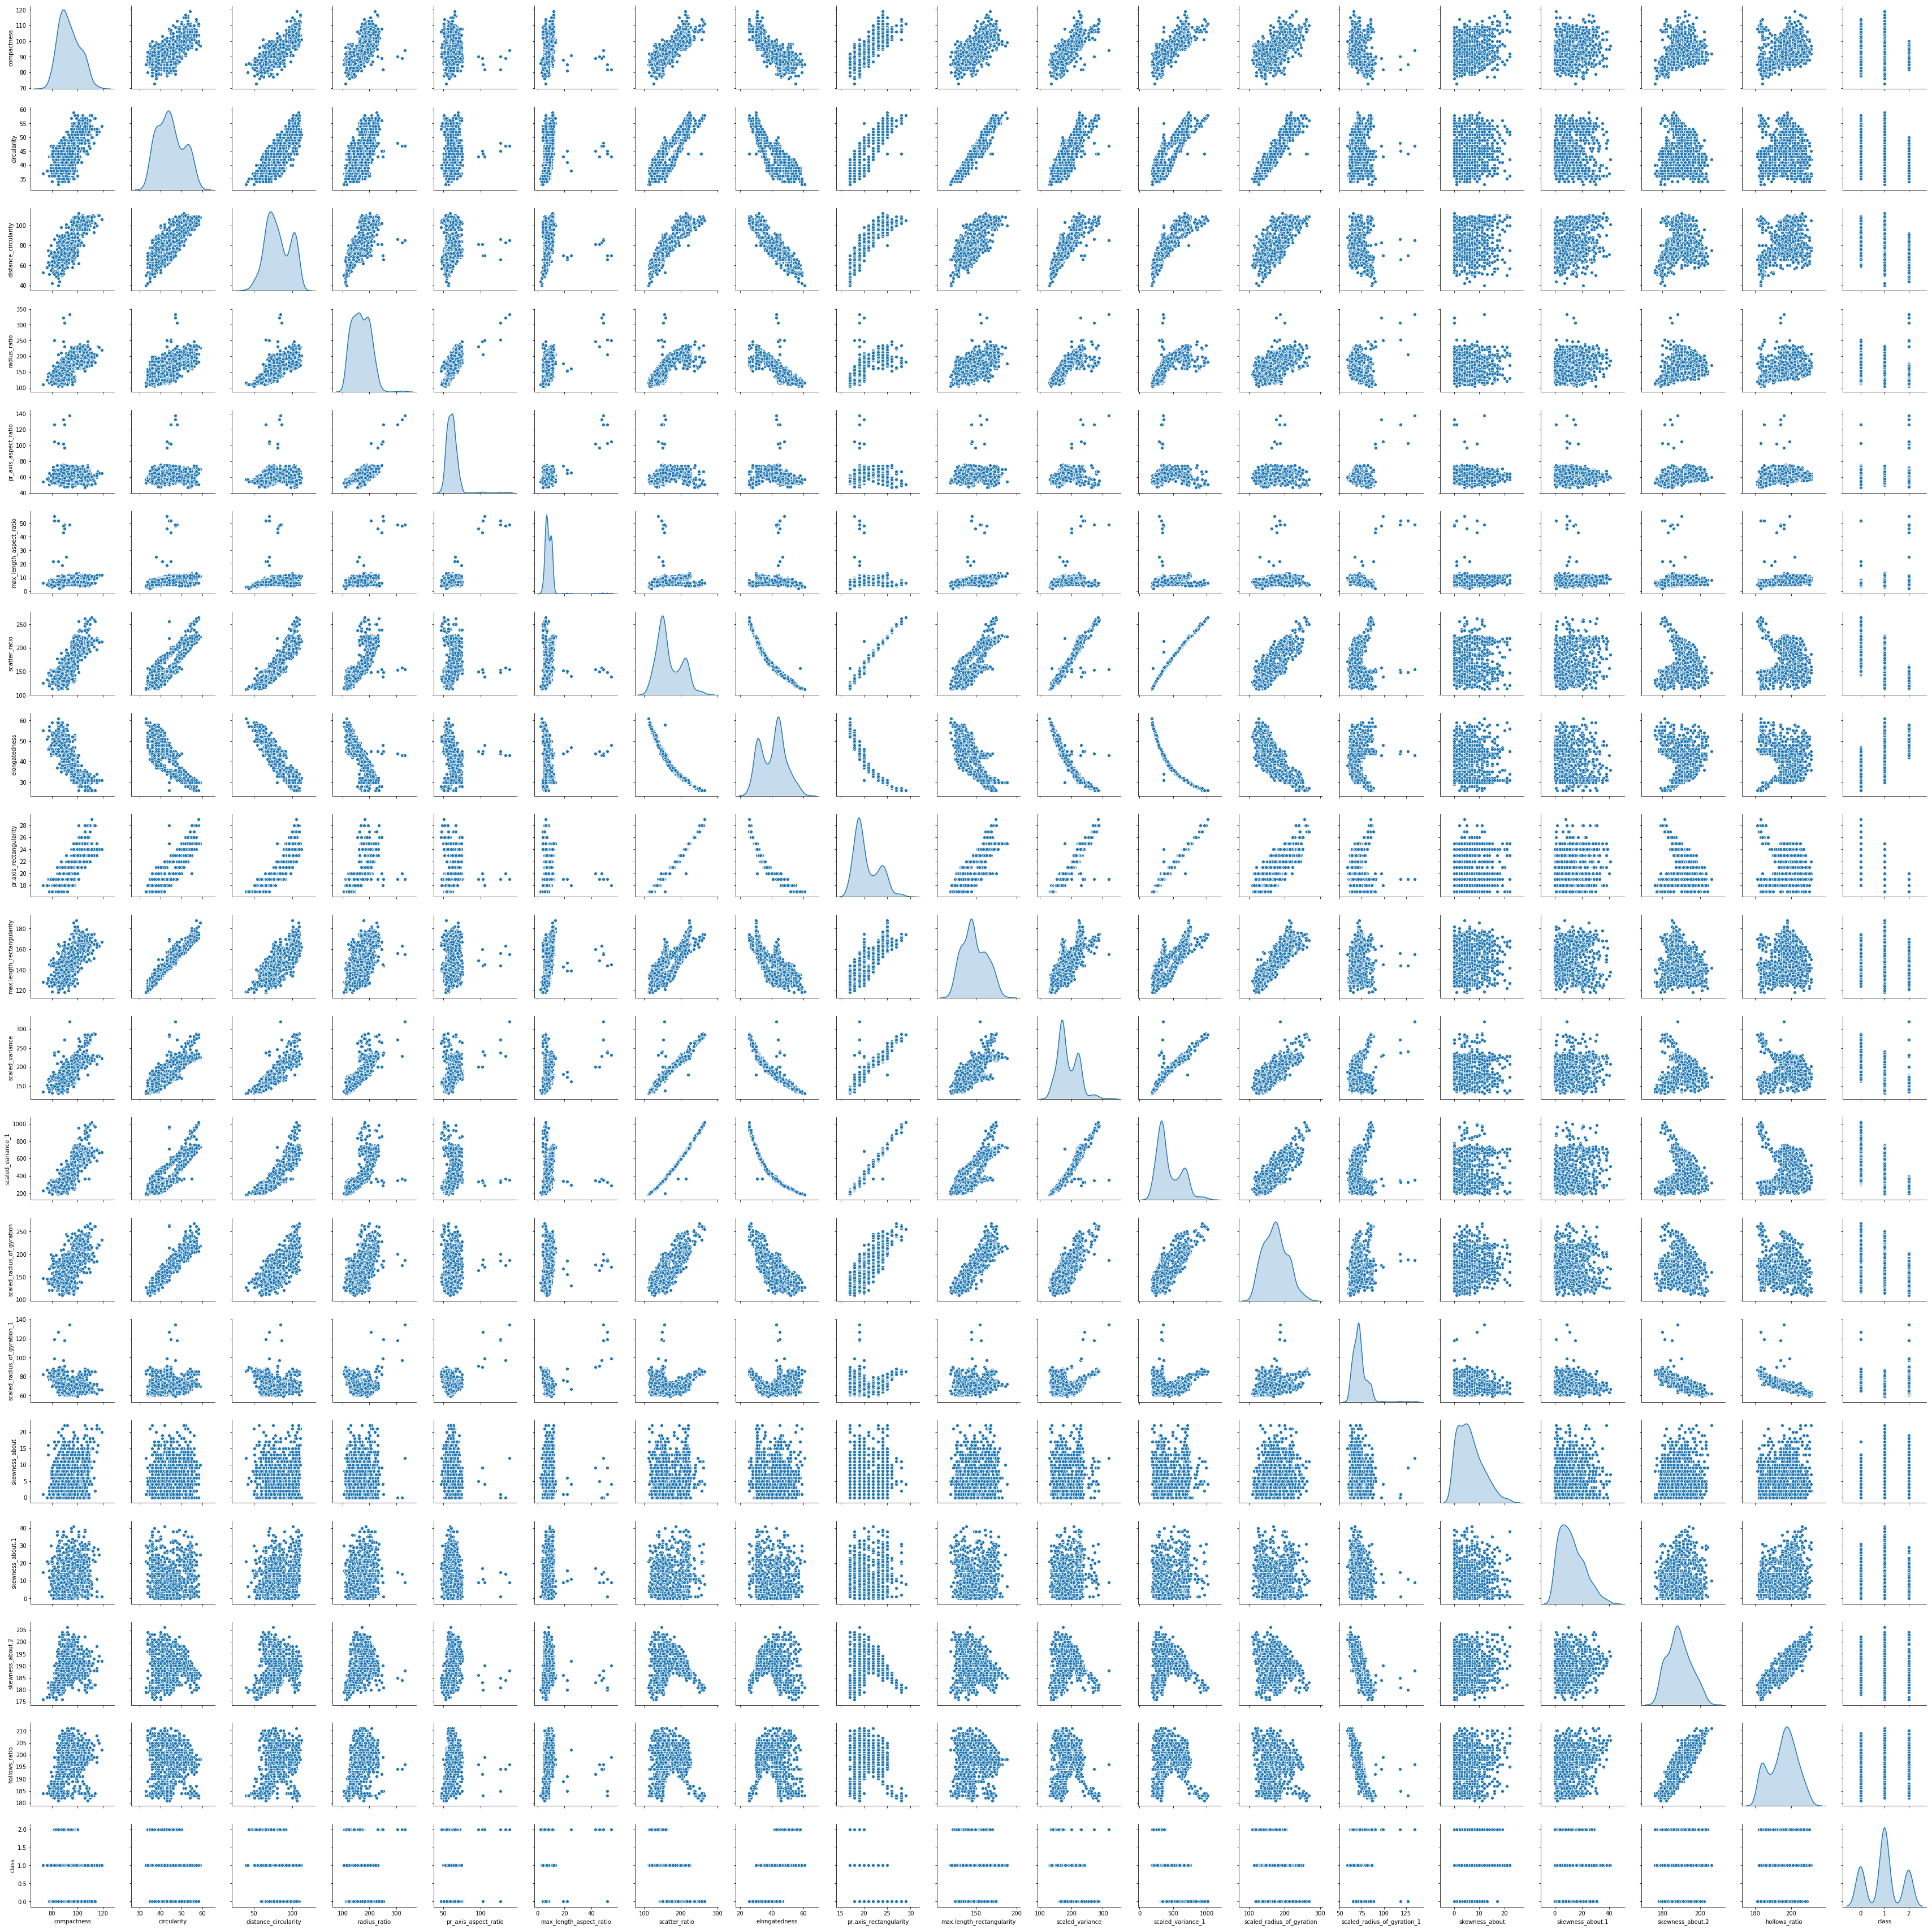

In [499]:
sns.pairplot(Vehicle, diag_kind='kde')

We see many of those independent variables are correlated with each other and hence we wil use PCA for dimentionality reduction.

# Step-5)

Splitting data into train - test and then wil use PCA.

In [500]:
X=Vehicle.drop('class' , axis=1)
y=Vehicle['class']

In [501]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

C:\Users\rashmi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rashmi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

In [502]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [503]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088705, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524633, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389657, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450215, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.0

Now checking how much variance is explained by each PCA

In [504]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549, 0.97335049, 0.98226265, 0.98735979,
       0.99104984, 0.9936357 , 0.99562195, 0.99714304, 0.99828498,
       0.99927917, 0.9998355 , 1.        ])

From above ouput , we can observe that PCA1 is explaining 52.1% , PCA2 is explaining 68.9% and so on. Same can be visualized in plot also.

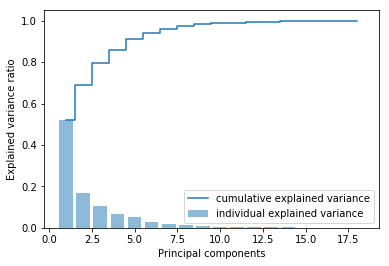

In [505]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
From above plot it is visible that after PCA7 plateauing has started.

In [506]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 18 to 7 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

Split dataset into train and test

In [508]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

C:\Users\rashmi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


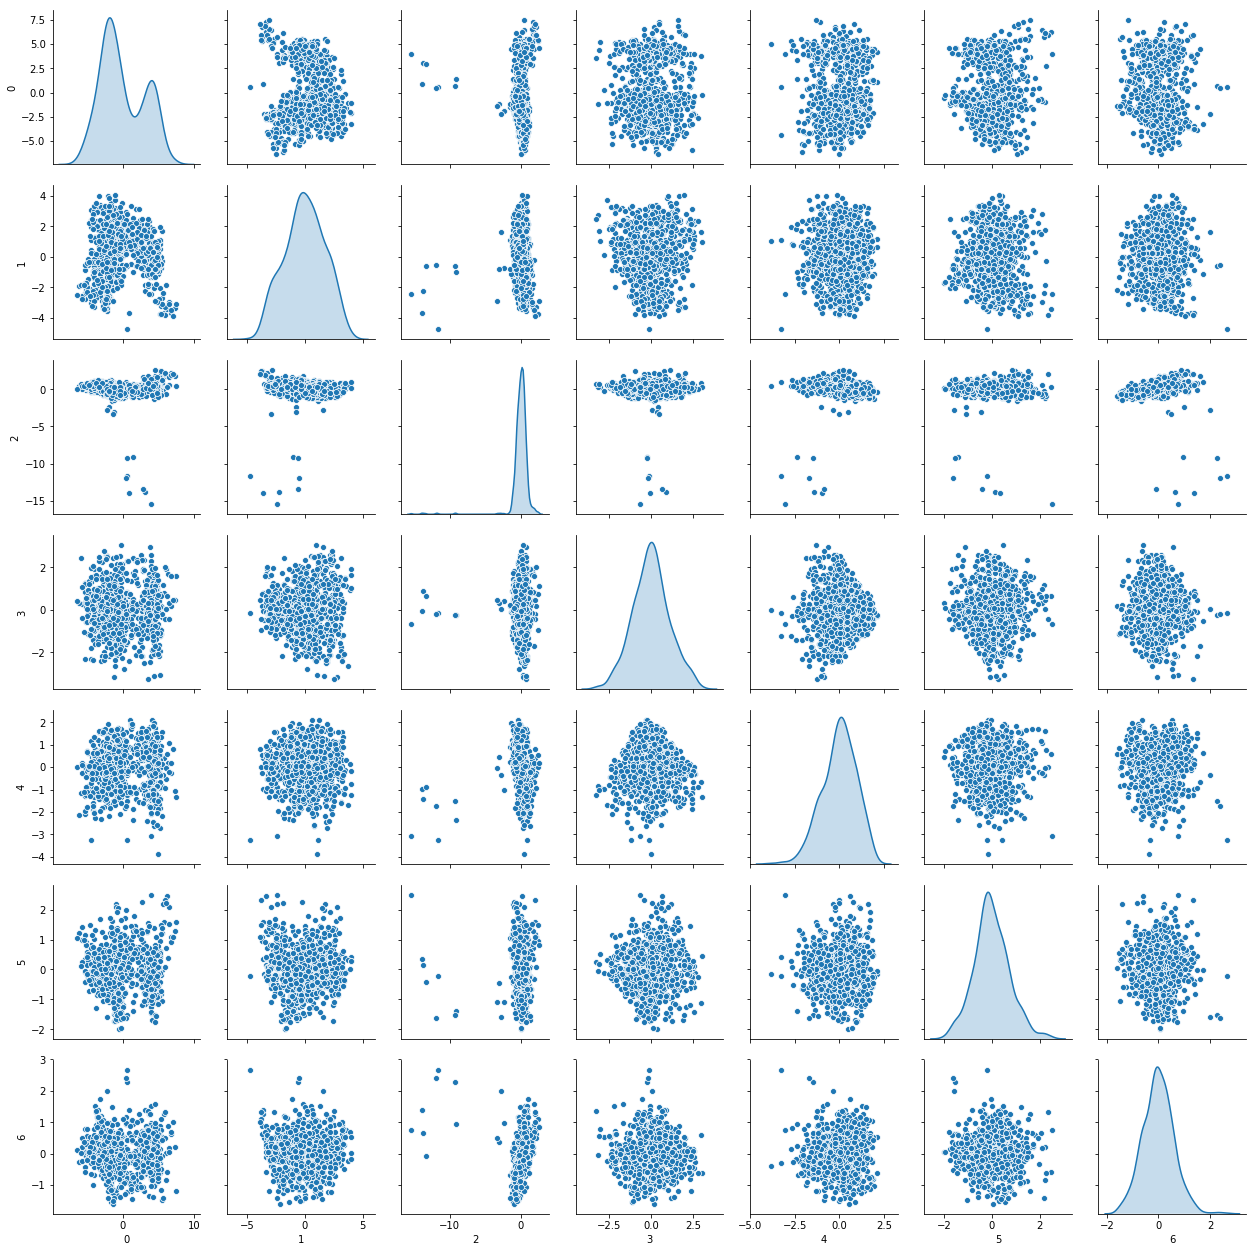

In [509]:
#Let us check it visually

sns.pairplot(Proj_data_df, diag_kind='kde') 

Now we clearly see that there is no correlation between independent variables.

# Step-6) Classification with SVM

In [416]:
from sklearn import svm

In [557]:
clf = svm.SVC(gamma=0.025, C=3)

In [558]:
clf.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [559]:
y_pred = clf.predict(X_test)

In [560]:
y_test=list(y_test)

In [561]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [515]:
getAccuracy(y_test , y_pred)
#score(X_test, y_test, sample_weight=None)

92.91338582677166

In [562]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred,average=None))
print(accuracy_score(y_test, y_pred))

[[ 60   4   2]
 [  4 117   6]
 [  0   2  59]]
[0.92307692 0.936      0.921875  ]
0.9291338582677166


# Step-7) Classification with Naive bayes

In [516]:
from sklearn.naive_bayes import GaussianNB
# For accuracy stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [563]:
classifier = GaussianNB()  # Instantiating naive bayes function
classifier.fit(X_train, y_train) # fitting X_train & y_trai

GaussianNB(priors=None, var_smoothing=1e-09)

In [564]:
y_pred = classifier.predict(X_test)

In [565]:
set(y_test)

{0, 1, 2}

In [566]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred,average=None))
print(accuracy_score(y_test, y_pred))

[[ 41  20   5]
 [  7 120   0]
 [  1  31  29]]
[0.71304348 0.80536913 0.61052632]
0.7480314960629921


# Conclusion 

> With PCA analysis we concluded that out of 18 only 7 PCAs are required to explain maximum variance in dataset.

> After running model with SVM and Naive Bayes , we obserevd much better confusion matrix, F1 score & Accuracy in SVM model.
